## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results)
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the DataFrame.
combined_mouse_data["Mouse ID"].nunique()

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_two_mice = combined_mouse_data[combined_mouse_data.duplicated(subset=["Timepoint", "Mouse ID"], keep="first")]
dup_two_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 

In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_count = combined_mouse_data.drop_duplicates()
final_data = combined_mouse_data[combined_mouse_data["Mouse ID"]!='g989']
final_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
final_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = mouse_count.groupby("Drug Regimen")

mean = drug_regimen["Tumor Volume (mm3)"].mean()
mean.name = "Mean"
median = drug_regimen["Tumor Volume (mm3)"].median()
median.name = "Median"
standard_deviation= drug_regimen.std()["Tumor Volume (mm3)"]
standard_deviation.name = "Standard Deviation"
variance = drug_regimen.var()["Tumor Volume (mm3)"]
variance.name = "Variance"
sem = drug_regimen.sem()["Tumor Volume (mm3)"]
sem.name = "SEM"
summary_statistics_df = pd.DataFrame([mean, median, variance, standard_deviation, sem]).T
summary_statistics_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = final_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_df
# This method produces everything in a single groupby function.

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
final_data = final_data.groupby("Drug Regimen").count()["Mouse ID"]
final_data_df = pd.DataFrame(final_data)
final_data_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


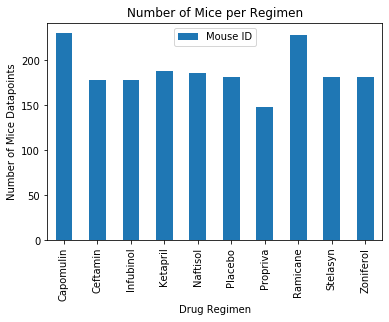

<Figure size 432x288 with 0 Axes>

In [47]:
#Generate bar plot using pandas that shows the number of mice per time point for each treatment regimen throughout the course of the study.
bar_plot = final_data_df.plot(kind="bar")
plt.title("Number of Mice per Regimen")
plt.ylabel("Number of Mice Datapoints")
plt.show()
plt.tight_layout()

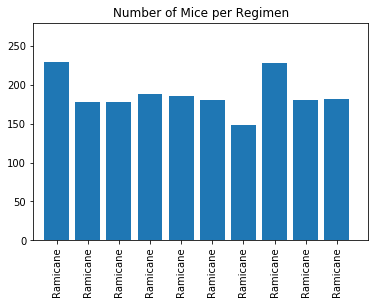

In [46]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(final_data_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, final_data_df["Mouse ID"], align="center") 
plt.title("Number of Mice per Regimen")
plt.xticks(tick_locations, final_data["Drug Regimen"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)) 
plt.ylim(0, max(final_data_df["Mouse ID"])+50)
plt.show()

## Pie Plots

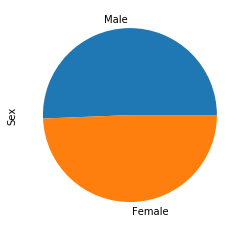

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = mouse_count["Sex"].value_counts()
pie_plot.plot.pie()


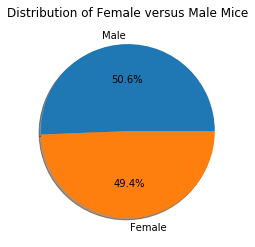

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = mouse_count["Sex"].value_counts()
labels = 'Male', 'Female'

fig1, ax1 = plt.subplots()
ax1.pie(pie_plot, labels=labels, autopct='%1.1f%%',
        shadow=True)
# plt.title('Distribution of Female versus Male Mice')
# plt.axis('equal')
ax1.set(aspect="equal", title='Distribution of Female versus Male Mice')
plt.show()
ax1.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [15]:
Capomulin = combined_mouse_data[combined_mouse_data['Drug Regimen'] == "Capomulin"]
Capomulin_Q1 = Capomulin['Tumor Volume (mm3)'].quantile(0.25)
Capomulin_Q3 = Capomulin['Tumor Volume (mm3)'].quantile(0.75)
Capomulin_IQR = Capomulin_Q3 - Capomulin_Q1
Capomulin_IQR #interquartile range of final tumor volume for Capomulin 

7.314067135000002

In [16]:
Ramicane = combined_mouse_data[combined_mouse_data['Drug Regimen'] == "Ramicane"]
Ramicane_Q1 = Ramicane['Tumor Volume (mm3)'].quantile(0.25)
Ramicane_Q3 = Ramicane['Tumor Volume (mm3)'].quantile(0.75)
Ramicane_IQR = Ramicane_Q3 - Ramicane_Q1
Ramicane_IQR 

8.325365415000007

In [17]:
Infubinol = combined_mouse_data[combined_mouse_data['Drug Regimen'] == "Infubinol"]
Infubinol_Q1 = Infubinol ['Tumor Volume (mm3)'].quantile(0.25)
Infubinol_Q3 = Infubinol ['Tumor Volume (mm3)'].quantile(0.75)
Infubinol_IQR = Infubinol_Q3 - Infubinol_Q1
Infubinol_IQR

10.002090667500006

In [18]:
Ceftamin = combined_mouse_data[combined_mouse_data['Drug Regimen'] == "Ceftamin"]
Ceftamin_Q1 = Ceftamin ['Tumor Volume (mm3)'].quantile(0.25)
Ceftamin_Q3 = Ceftamin ['Tumor Volume (mm3)'].quantile(0.75)
Ceftamin_IQR = Ceftamin_Q3 - Ceftamin_Q1
Ceftamin_IQR

9.5930104575

In [29]:
#Calculate outlier
outlier_offset = Capomulin_IQR*1.5
Capomulin[Capomulin['Tumor Volume (mm3)']>(Capomulin_Q3+outlier_offset)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [20]:
Capomulin[Capomulin['Tumor Volume (mm3)']<(Capomulin_Q1 - outlier_offset)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [21]:
outlier_Ramicane = Ramicane_IQR*1.5
Ramicane[Ramicane['Tumor Volume (mm3)']>(Ramicane_Q3+outlier_Ramicane)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [22]:
Ramicane[Ramicane['Tumor Volume (mm3)']<(Ramicane_Q1 - outlier_offset)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [23]:
outlier_Ceftamin = Ramicane_IQR*1.5
Ceftamin[Ceftamin['Tumor Volume (mm3)']>(Ceftamin_Q3+outlier_Ceftamin)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [24]:
Ceftamin[Ceftamin['Tumor Volume (mm3)']<(Ceftamin_Q1 - outlier_offset)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [25]:
outlier_Infubinol = Ramicane_IQR*1.5
Infubinol[Infubinol['Tumor Volume (mm3)']>(Infubinol_Q3+outlier_Ramicane)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
637,c139,Infubinol,Male,11,28,45,72.226731,2


In [45]:
Infubinol[Infubinol['Tumor Volume (mm3)']<(Infubinol_Q1 - outlier_offset)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


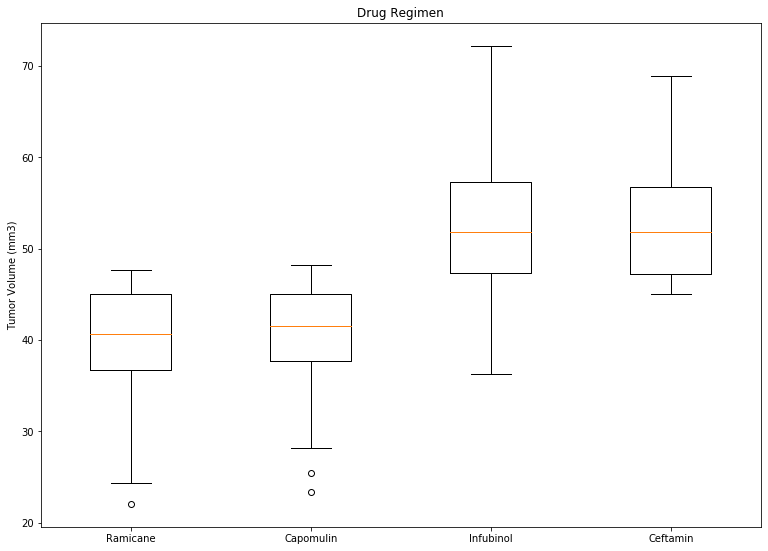

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug_box = [Ramicane["Tumor Volume (mm3)"], Capomulin["Tumor Volume (mm3)"], Infubinol["Tumor Volume (mm3)"], Ceftamin["Tumor Volume (mm3)"]]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_title('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

ax.boxplot(drug_box)
plt.xticks([1, 2, 3, 4], ['Ramicane','Capomulin','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_line = final_data[final_data["Mouse ID"] =="l509"]
Capomulin_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


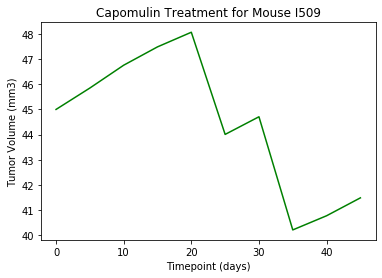

In [42]:
#line plot
x_axis = Capomulin_line["Timepoint"]
y_axis = Capomulin_line["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color="green", label="Timepoint")
plt.title("Capomulin Treatment for Mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

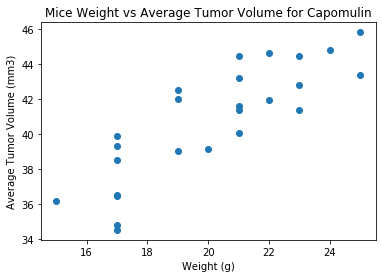

In [37]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average_tumor_volume = Capomulin.groupby(["Mouse ID"]).mean()
x_values = average_tumor_volume["Weight (g)"]
y_values = average_tumor_volume["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.title("Mice Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation is 0.7088568047708717


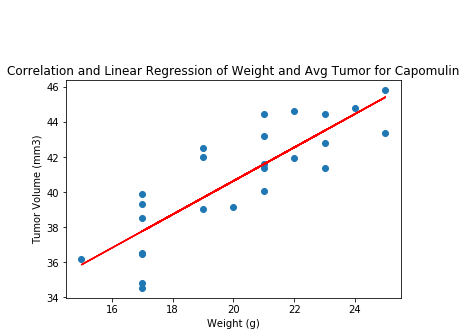

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values_1 = average_tumor_volume["Weight (g)"]
y_values_1 = average_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_1, y_values_1)
regress_values = x_values * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The correlation is {rvalue**2}")
      
plt.title("Correlation and Linear Regression of Weight and Avg Tumor for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()